***11.Model Evaluation***

In [1]:
#11.1 Cross-Validating Models
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import KFold,cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
digits=datasets.load_digits()
features=digits.data
target=digits.target
standardizer=StandardScaler()
logit=LogisticRegression()
pipeline=make_pipeline(standardizer,logit)
kf=KFold(n_splits=10,shuffle=True,random_state=1)
cv_results=cross_val_score(pipeline,features,target,cv=kf,scoring='accuracy',n_jobs=-1)
cv_results.mean()



np.float64(0.9699472377405337)

In [2]:
cv_results

array([0.97777778, 0.98888889, 0.96111111, 0.94444444, 0.97777778,
       0.98888889, 0.95555556, 0.98882682, 0.97765363, 0.93854749])

In [3]:
from sklearn.model_selection import train_test_split
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.3,random_state=1,stratify=target)
standardizer.fit(features_train)
features_train_standardized=standardizer.transform(features_train)
features_test_standardized=standardizer.transform(features_test)      

In [4]:
pipeline=make_pipeline(standardizer,logit)
cv_results=cross_val_score(pipeline,features_train,target_train,cv=kf,scoring='accuracy',n_jobs=-1)

In [13]:
#11.2 Creating a baseline Regression Model
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
digits=load_digits()
features,target=digits.data,digits.target
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.3,random_state=1)
dummy=DummyClassifier(strategy='most_frequent')
dummy.fit(features_train,target_train)
dummy.score(features_test,target_test)

0.08703703703703704

In [15]:
from sklearn.linear_model import LinearRegression
ols=LinearRegression()
ols.fit(features_train,target_train)
ols.score(features_test,target_test)


0.6029432540851964

In [1]:
#11.3 Creating a baseline classification model
from sklearn.datasets import load_iris
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
iris=load_iris()
features,target=iris.data,iris.target
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.3,random_state=1,stratify=target)
dummy=DummyClassifier(strategy='uniform', random_state=1)
dummy.fit(features_train,target_train)
dummy.score(features_test,target_test)

0.35555555555555557

In [2]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(features_train,target_train)
classifier.score(features_test,target_test)

0.9777777777777777

In [3]:
#11.4 Evaluating binary classifiers predictions
#Use scilit learn cross_val_score while using scoring parameter to define the metric to be used for evaluation including accuracy, precision, recall, f1, roc_auc
#Accuracy: (TP+TN)/(TP+TN+FP+FN)
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
features,target=make_classification(n_samples=10000,n_features=20,n_informative=2,n_redundant=10,random_state=1)
logit=LogisticRegression()
scores=cross_val_score(logit,features,target,scoring='accuracy',cv=5)
scores.mean()

np.float64(0.8751000000000001)

In [7]:
#precision: TP/(TP+FP)
scores=cross_val_score(logit,features,target,scoring='precision')


In [6]:
#recall: TP/(TP+FN)
scores=cross_val_score(logit,features,target,scoring='recall')

In [8]:
#F1 score: 2*(precision*recall)/(precision+recall)
scores=cross_val_score(logit,features,target,scoring='f1')

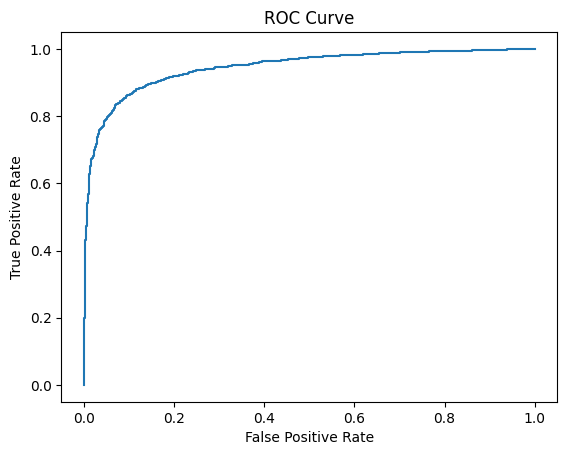

0.9441126547222367

In [1]:
#11.5 Evaluating  Binary classifier thresholds
#The Receiving Operating characteristic (ROC) curve is a plot of the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.
#The area under the ROC curve (AUC) is a single scalar value that summarizes the performance of a classifier across all possible thresholds.
#It's a common method for evaluating  the quality of a binary classifiers.
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,roc_auc_score
features,target=make_classification(n_samples=10000,n_features=20,n_informative=2,n_redundant=10,random_state=1)
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.3,random_state=1)
logit=LogisticRegression()
logit.fit(features_train,target_train)
target_probabilities=logit.predict_proba(features_test)[:,1]
fpr,tpr,thresholds=roc_curve(target_test,target_probabilities)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
roc_auc=roc_auc_score(target_test,target_probabilities)
roc_auc

In [2]:
logit.predict_proba(features_test)[:,1] 


array([0.99959808, 0.04415833, 0.99572288, ..., 0.01954517, 0.00104301,
       0.99909707])

In [3]:
logit.classes_

array([0, 1])

In [4]:
#The ROC curve represnts the respective TPR and FPR at various threshold settings. Each point on the curve corresponds to a specific threshold value used to classify instances as positive or negative. The diagonal line from (0,0) to (1,1) represents a random classifier,
print("thresholds:", thresholds[116])
print("FPR:", fpr[116])
print("TPR:", tpr[116])

thresholds: 0.6977172467027568
FPR: 0.046948356807511735
TPR: 0.7872763419483101


In [5]:
print("thresholds:", thresholds[45])
print("FPR:", fpr[45])
print("TPR:", tpr[45])

thresholds: 0.8655723136689084
FPR: 0.014755197853789403
TPR: 0.6428098078197482


In [7]:
roc_auc_score(target_test, target_probabilities)

0.9441126547222367

In [9]:
#11.6 Evaluating multiclass classifiers Predictions
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
features,target=make_classification(n_samples=10000,n_features=20,n_informative=10,n_redundant=5,n_classes=3,n_clusters_per_class=1,random_state=1)
logit=LogisticRegression(multi_class='multinomial',solver='lbfgs',max_iter=1000)
cross_val_score(logit,features,target,scoring='accuracy',cv=5)

d:\180 days of ML\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\180 days of ML\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\180 days of ML\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\180 days of ML\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.

array([0.8615, 0.8715, 0.869 , 0.88  , 0.863 ])

In [10]:
cross_val_score(logit,features,target,scoring='f1_macro',cv=5)

d:\180 days of ML\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\180 days of ML\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\180 days of ML\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\180 days of ML\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.

array([0.86156169, 0.8711705 , 0.86888718, 0.87987702, 0.86310064])

# _macro refers to the method to average the evaluation scores from the classes:
#_micro: Calculate metrics globally by counting the total true positives, false negatives and false positives.
#_macro: Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
#weighted: Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters 'macro' to account for label imbalance.

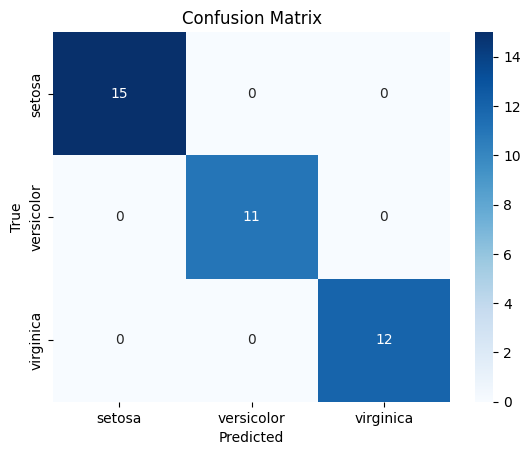

In [ ]:
#11.7 Visualizing a classifier's performance
# Use  a confusion matrix ,which compares predicted classes and true classes
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
iris=load_iris()
X_train,X_test,y_train,y_test=train_test_split(iris.data,iris.target,random_state=42)
logit=LogisticRegression(max_iter=200)
logit.fit(X_train,y_train)
y_pred=logit.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=iris.target_names,yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix') #confusion matrix is a performance measurement for classification models in ML (often vsiualized as a heatmap)
plt.show()


In [ ]:
#11.8 Evaluating Regression Models
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
features,target =make_regression(n_samples=100,n_features=3,n_informative=3,n_targets=1,noise=50,coef=False,random_state=1)
ols=LinearRegression()
cross_val_score(ols,features,target,scoring='neg_mean_squared_error') #MSE=1/n * sum(actual-predicted)^2

array([-1974.65337976, -2004.54137625, -3935.19355723, -1060.04361386,
       -1598.74104702])

In [ ]:
cross_val_score(ols,features,target,scoring='r2') #R-squared (R²) =1 - (SS_res / SS_tot)

array([0.8622399 , 0.85838075, 0.74723548, 0.91354743, 0.84469331])

In [18]:
#11.9 Evaluating Clustering Models
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
features, _ = make_blobs(n_samples=1000, centers=2, cluster_std=0.5, random_state=1)
kmeans = KMeans(n_clusters=2,random_state=1).fit(features)
target_predicted=kmeans.labels_
silhouette_score(features,target_predicted) #The silhouette score measures how similar an object is to its own cluster compared to other clusters. The silhouette score ranges from -1 to 1, where a value close to 1 indicates that the object is well clustered, a value close to 0 indicates that the object is on or very close to the decision boundary between two neighboring clusters, and a value close to -1 indicates that the object may have been assigned to the wrong cluster.


0.9245079092982331

In [19]:
#Formally, the ith observation's silhouette score s(i) is defined as:s(i) = (b(i) - a(i)) / max(a(i), b(i)) where:
#- a(i) is the average distance between the ith observation and all other points in the same cluster.
#- b(i) is the minimum average distance from the ith observation to all points in any other cluster.


In [25]:
#11.10 Creating a custom evaluation metric
#scikit-learn's make_scorer
from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
features,target=make_regression(n_samples=1000,n_features=3,random_state=1)
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.10,random_state=1)
def custom_metric(target_test,target_predicted):
    r2=r2_score(target_test,target_predicted)
    return r2
custom_scorer=make_scorer(custom_metric,greater_is_better=True)
classifier=Ridge()
model=classifier.fit(features_train,target_train)
custom_scorer(model,features_test,target_test)


0.9999986456090798

In [26]:
target_predicted=model.predict(features_test)
r2_score(target_test,target_predicted)

0.9999986456090798

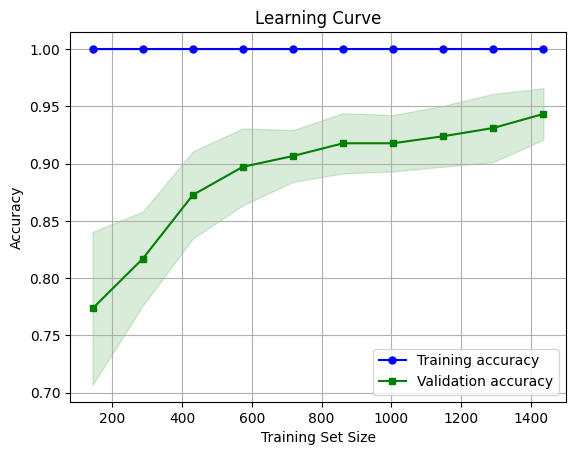

In [27]:
#11.11 Visualizing the effect of training set size
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
digits=load_digits()
features,target=digits.data,digits.target
#features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.3,random_state=1,stratify=target)
train_sizes,train_scores,test_scores=learning_curve(RandomForestClassifier(),features,target,train_sizes=np.linspace(0.1,1.0,10),cv=5,scoring='accuracy',n_jobs=-1)
train_means=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_means=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)
plt.plot(train_sizes,train_means,color='blue',marker='o',markersize=5,label='Training accuracy')
plt.plot(train_sizes,test_means,color='green',marker='s',markersize=5,label='Validation accuracy')
plt.fill_between(train_sizes,train_means+train_std,train_means-train_std,alpha=0.15,color='blue')
plt.fill_between(train_sizes,test_means+test_std,test_means-test_std,alpha=0.15,color='green')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [28]:
#11.12 Creating a Text Report of Evaluation Metrices
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
iris=load_iris()
features,target=iris.data,iris.target

features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.3,random_state=1,stratify=target)
logit=LogisticRegression(max_iter=200)
logit.fit(features_train,target_train)
target_predicted=logit.predict(features_test)

print(classification_report(target_test,target_predicted,target_names=iris.target_names))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



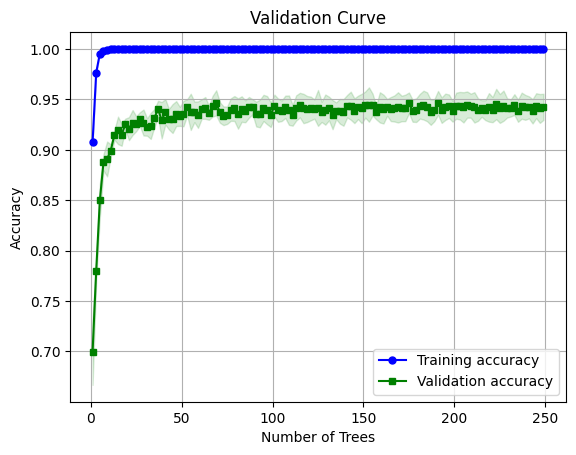

In [ ]:
#11.13 Visualizing The effect of hyperpareameter values
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve
digits=load_digits()
features,target=digits.data,digits.target
param_range=np.arange(1,250,2)
train_scores,test_scores=validation_curve(RandomForestClassifier(),features,target,param_name='n_estimators',param_range=param_range,cv=3,scoring='accuracy',n_jobs=-1)
train_means=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_means=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)
plt.plot(param_range,train_means,color='blue',marker='o',markersize=5,label='Training accuracy')
plt.plot(param_range,test_means,color='green',marker='s',markersize=5,label='Validation accuracy')
plt.fill_between(param_range,train_means+train_std,train_means-train_std,alpha=0.15,color='blue')
plt.fill_between(param_range,test_means+test_std,test_means-test_std,alpha=0.15,color='green')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Validation Curve')

plt.legend(loc='lower right')
plt.grid()
plt.show()

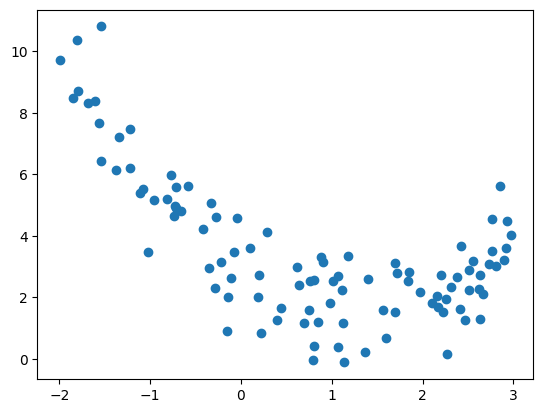

In [6]:
#Bias variance tradeoff
import numpy as np
import matplotlib.pyplot as plt
m = 100
X = 5 * np.random.rand(m, 1) - 2
y = 0.7 * X ** 2 - 2 * X + 3 + np.random.randn(m, 1)

plt.scatter(X, y)
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
X_train,X_test,y_train,y_test = train_test_split(X.reshape(100,1),y.reshape(100),test_size=0.2,random_state=2)
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=15)

X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

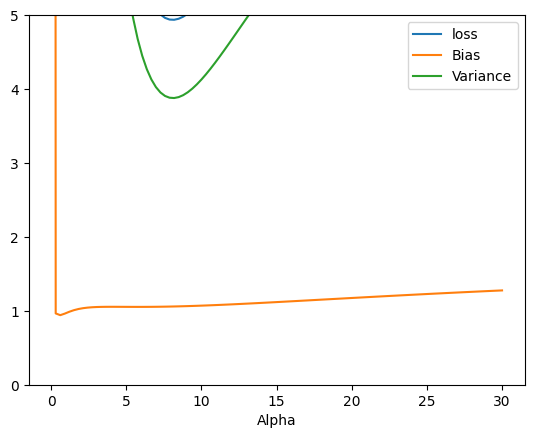

In [11]:
from mlxtend.evaluate import bias_variance_decomp

alphas = np.linspace(0,30,100)

loss = []
bias = []
variance = []

for i in alphas:
    reg = Ridge(alpha=i)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        reg, X_train, y_train, X_test, y_test, 
        loss='mse',
        random_seed=123)
    loss.append(avg_expected_loss)
    bias.append(avg_bias)
    variance.append(avg_var)
plt.plot(alphas,loss,label='loss')
plt.plot(alphas,bias,label='Bias')
plt.plot(alphas,variance,label='Variance')
plt.ylim(0,5)
plt.xlabel('Alpha')
plt.legend()